In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [3]:
df = pd.read_csv("../dataset/normalized_landmark_data.csv")
print("Shape:", df.shape)
df.head()


Shape: (6726, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,label
0,0.0,0.0,0.0,0.100062,-0.079568,-0.071695,0.165115,-0.201533,-0.094472,0.190854,...,-0.103677,-0.281385,-0.051314,-0.090153,-0.210926,-0.054748,-0.066068,-0.158805,-0.036309,A
1,0.0,0.0,0.0,-0.074745,-0.067935,0.008979,-0.098548,-0.167550,0.009847,-0.097894,...,0.007697,-0.228289,-0.065971,0.004238,-0.170635,-0.051326,0.026767,-0.140680,-0.031304,A
2,0.0,0.0,0.0,-0.075649,-0.048643,0.009929,-0.107308,-0.149259,0.017981,-0.105004,...,0.009946,-0.220742,-0.048489,0.004862,-0.152753,-0.036006,0.027312,-0.115358,-0.015016,A
3,0.0,0.0,0.0,0.102143,-0.061440,-0.025326,0.159172,-0.173757,-0.026346,0.171883,...,-0.060478,-0.253134,-0.053640,-0.044469,-0.192391,-0.042764,-0.040384,-0.142187,-0.020915,A
4,0.0,0.0,0.0,-0.098195,-0.053877,-0.072555,-0.160475,-0.180233,-0.087950,-0.180074,...,0.107297,-0.261444,-0.014141,0.092966,-0.190400,-0.005004,0.073105,-0.144535,0.017936,A


In [5]:
print(y.value_counts())

label
G        293
H        288
C        285
T        284
I        283
A        282
N        280
W        276
Q        275
O        274
R        274
K        272
S        271
J        271
B        267
U        265
F        263
L        263
P        259
V        258
D        258
M        257
X        251
E        242
Y        234
Blank      1
Name: count, dtype: int64


In [6]:
# Remove empty or unwanted labels
df = df[df['label'].str.strip().astype(bool)]  # Removes empty strings
df = df[df['label'].str.len() == 1]  # Keeps only single-letter labels (A–Z)

In [7]:
# Optional: show class counts
print(df['label'].value_counts())

label
G    293
H    288
C    285
T    284
I    283
A    282
N    280
W    276
Q    275
R    274
O    274
K    272
J    271
S    271
B    267
U    265
L    263
F    263
P    259
V    258
D    258
M    257
X    251
E    242
Y    234
Name: count, dtype: int64


In [8]:
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [9]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9754646840148699

Classification Report:
               precision    recall  f1-score   support

           A       0.98      1.00      0.99        56
           B       0.98      0.96      0.97        53
           C       1.00      0.96      0.98        57
           D       0.98      0.90      0.94        52
           E       0.94      0.98      0.96        48
           F       0.96      0.98      0.97        53
           G       1.00      0.95      0.97        59
           H       0.98      1.00      0.99        57
           I       1.00      0.98      0.99        57
           J       0.96      1.00      0.98        54
           K       1.00      1.00      1.00        54
           L       0.98      0.98      0.98        53
           M       0.98      0.92      0.95        51
           N       1.00      1.00      1.00        56
           O       0.96      1.00      0.98        55
           P       0.93      0.98      0.95        52
           Q       1.00    

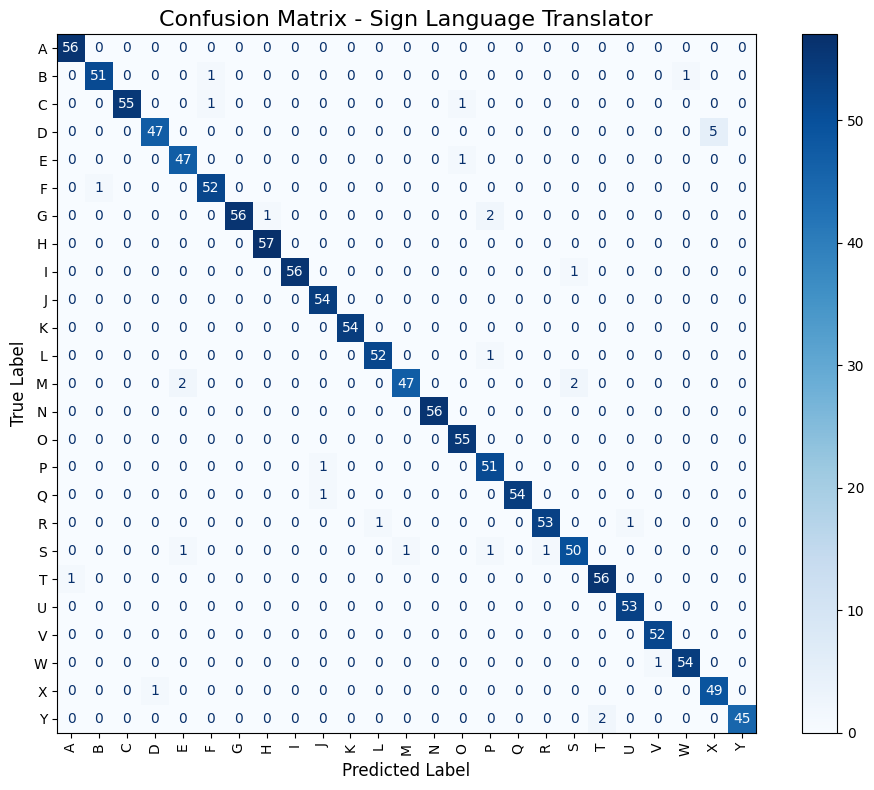

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10, 8))  # 📏 Create a figure first
disp.plot(cmap='Blues', ax=ax, xticks_rotation='vertical', values_format='d')

plt.title("Confusion Matrix - Sign Language Translator", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

plt.tight_layout()  # 📏 Adjust layout nicely
plt.savefig("../utils/confusion_matrix_1.png", bbox_inches='tight')  # 🖼️ Save it properly
plt.show()  # 👀 Optional: Show it too

In [13]:
joblib.dump(clf, "../models/gesture_classifier_normalized.pkl")
print("Model saved to gesture_classifier_normalized.pkl")

Model saved to gesture_classifier_normalized.pkl
